## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn_pandas
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)


## Loading the dataset

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Python Course/Loan_Modelling.csv')

data=df.copy()
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Overview

* Observations
* Sanity checks

In [ ]:
#change ID to index
df.set_index('ID',inplace=True)

In [ ]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#change ZIPCode to categorical value
df['ZIPCode']=df['ZIPCode'].astype('category')

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.shape

(5000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(11)
memory usage: 537.4 KB


In [ ]:
df.isnull().sum()

,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0


There is no missing values

In [ ]:
df.duplicated().sum()

0

There is no duplicate rows

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

Answers to question 1,3,4 and 5 are answered later in the section

In [ ]:
df[df['CreditCard']!=0].shape

(1470, 13)

1470 Customers have credit cards

<Axes: ylabel='Age'>

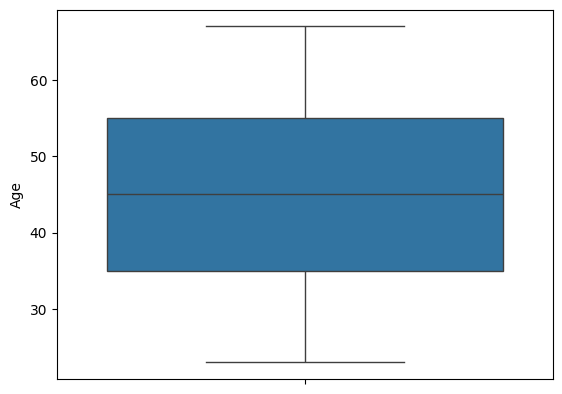

In [ ]:
sns.boxplot(df['Age'])

<Axes: ylabel='Income'>

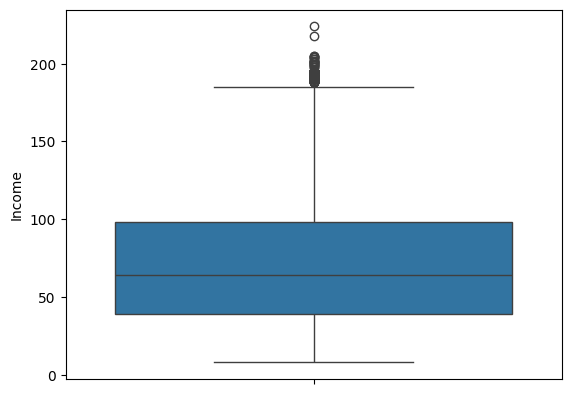

In [ ]:
sns.boxplot(df['Income'])

The outliers to income are valid, we won't remove them

<Axes: ylabel='Experience'>

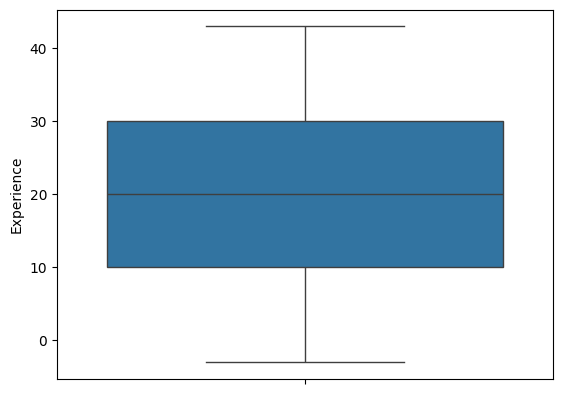

In [ ]:
sns.boxplot(df['Experience'])

<Axes: ylabel='CCAvg'>

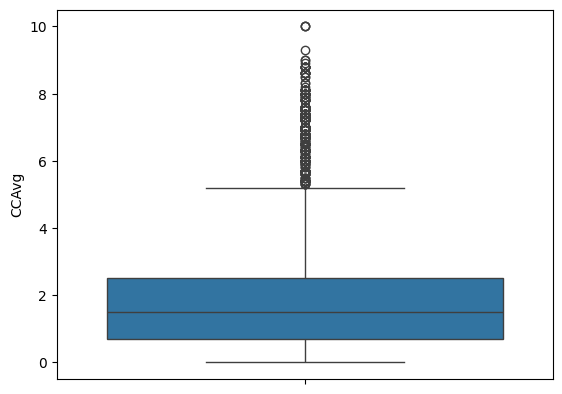

In [ ]:
sns.boxplot(df['CCAvg'])

OUtliers for number of credit cards also looks valid, we won't remove them either

<Axes: ylabel='Family'>

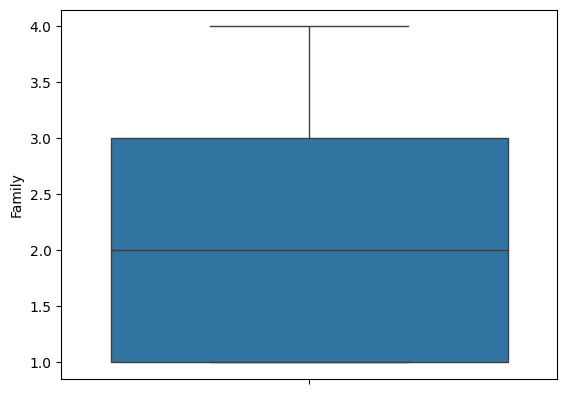

In [ ]:
sns.boxplot(df['Family'])

<Axes: ylabel='Mortgage'>

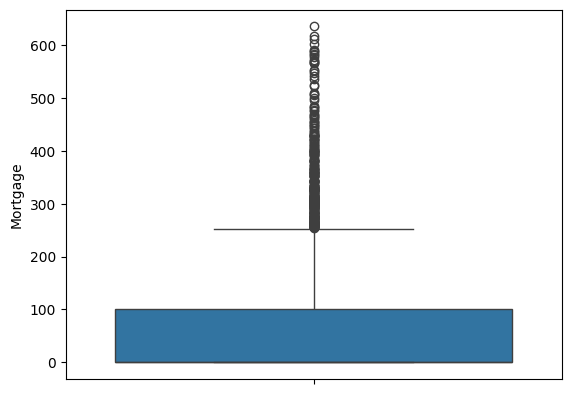

In [ ]:
sns.boxplot(df['Mortgage'])

In [ ]:
df[df['Mortgage']!=0].shape

(1538, 13)

In [ ]:
Mortgage_data = df[df['Mortgage']!=0]
Mortgage_data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,,,,,,,,,,,,,
6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
21,56,31,25,94015,4,0.9,2,111,0,0,0,1,0
23,29,5,62,90277,1,1.2,1,260,0,0,0,1,0


In [ ]:
Mortgage_data.shape

(1538, 13)

<Axes: ylabel='Mortgage'>

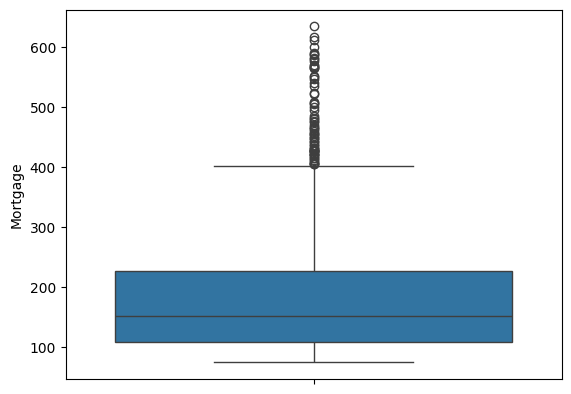

In [ ]:
sns.boxplot(Mortgage_data['Mortgage'])

There are outliers for Mortgage, but we won't remove them as they are valid values

In [ ]:
df['Personal_Loan'].value_counts()

,count
Personal_Loan,
0,4520
1,480


In [ ]:
df['Personal_Loan'].value_counts(normalize=True)

,proportion
Personal_Loan,
0,0.904
1,0.096


90% of customers don't have a personal loan

In [ ]:
df['Securities_Account'].value_counts()

,count
Securities_Account,
0,4478
1,522


In [ ]:
df['CD_Account'].value_counts()

,count
CD_Account,
0,4698
1,302


In [ ]:
df['Online'].value_counts()

,count
Online,
1,2984
0,2016


In [ ]:
df['CreditCard'].value_counts()

,count
CreditCard,
0,3530
1,1470


<Axes: xlabel='Personal_Loan', ylabel='Age'>

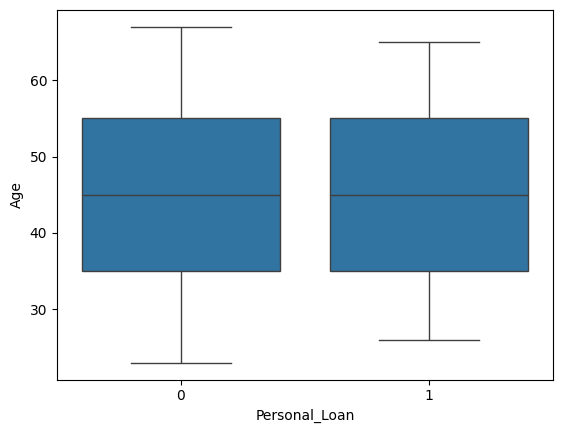

In [ ]:
sns.boxplot(data=df,y='Age',x='Personal_Loan')

There is no correlation between age and personal loan

<Axes: xlabel='Personal_Loan', ylabel='Income'>

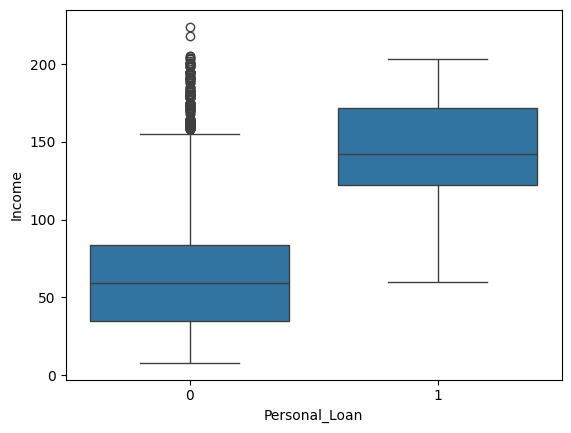

In [ ]:
sns.boxplot(data=df,y='Income',x='Personal_Loan')

There is a strong correlation between Income and Personal loan

<Axes: xlabel='Personal_Loan', ylabel='Experience'>

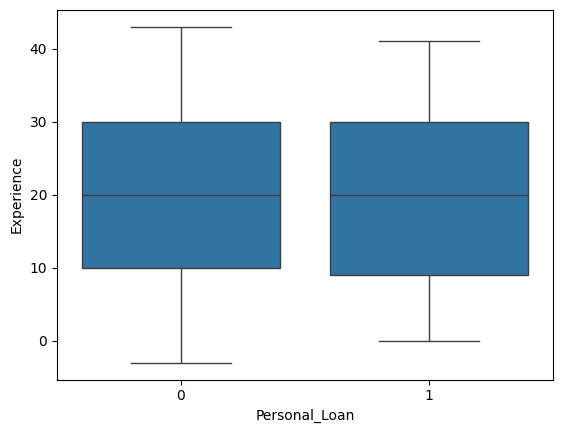

In [ ]:
sns.boxplot(data=df,y='Experience',x='Personal_Loan')

There is no correlation between experience and personal loan

<Axes: xlabel='Personal_Loan', ylabel='CCAvg'>

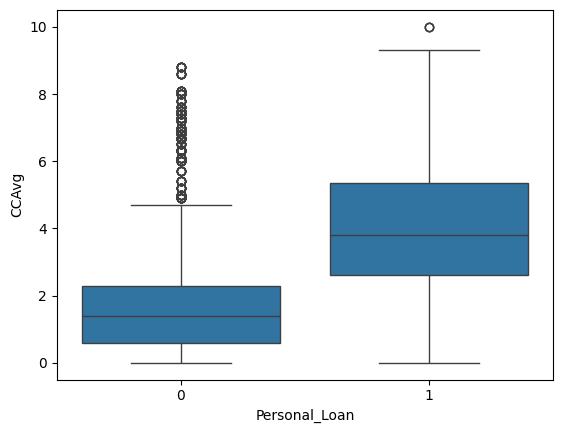

In [ ]:
sns.boxplot(data=df,y='CCAvg',x='Personal_Loan')

There is a correlation between number of credit cards and personal loans

<Axes: xlabel='Personal_Loan', ylabel='Family'>

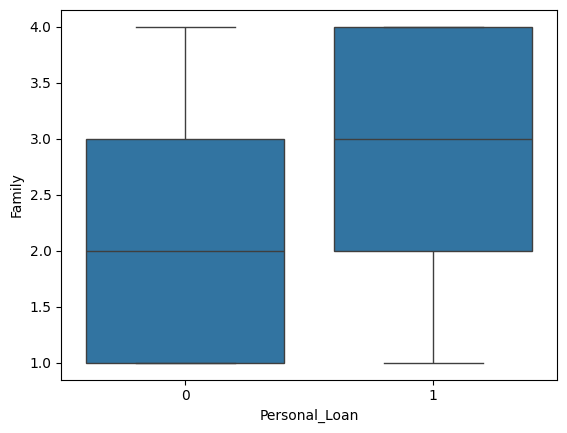

In [ ]:
sns.boxplot(data=df,y='Family',x='Personal_Loan')

There is a correlation between number of family members and personal loan

<Axes: xlabel='Personal_Loan', ylabel='Mortgage'>

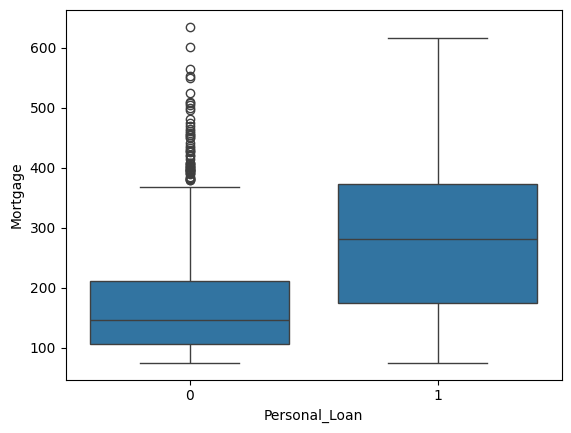

In [ ]:
sns.boxplot(data=Mortgage_data,y='Mortgage',x='Personal_Loan')

<Axes: xlabel='Personal_Loan', ylabel='Education'>

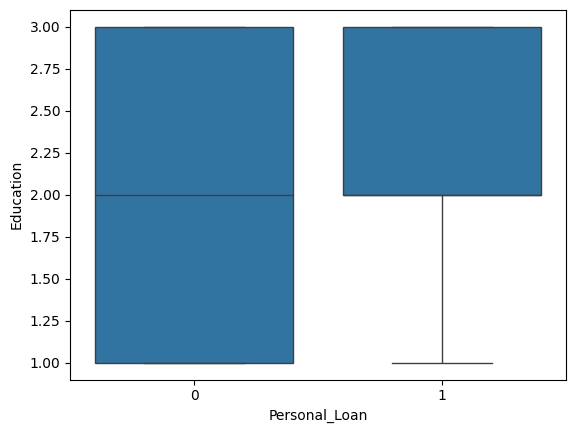

In [ ]:
sns.boxplot(data=df,y='Education',x='Personal_Loan')

There is a correlation between education and personal loan

In [ ]:
df[df['Personal_Loan']!=0].groupby('ZIPCode')['Personal_Loan'].value_counts()

,,count
ZIPCode,Personal_Loan,
90005,1,0
90007,1,0
90009,1,0
90011,1,0
90016,1,1
...,...,...
96091,1,0
96094,1,0
96145,1,0


<Axes: >

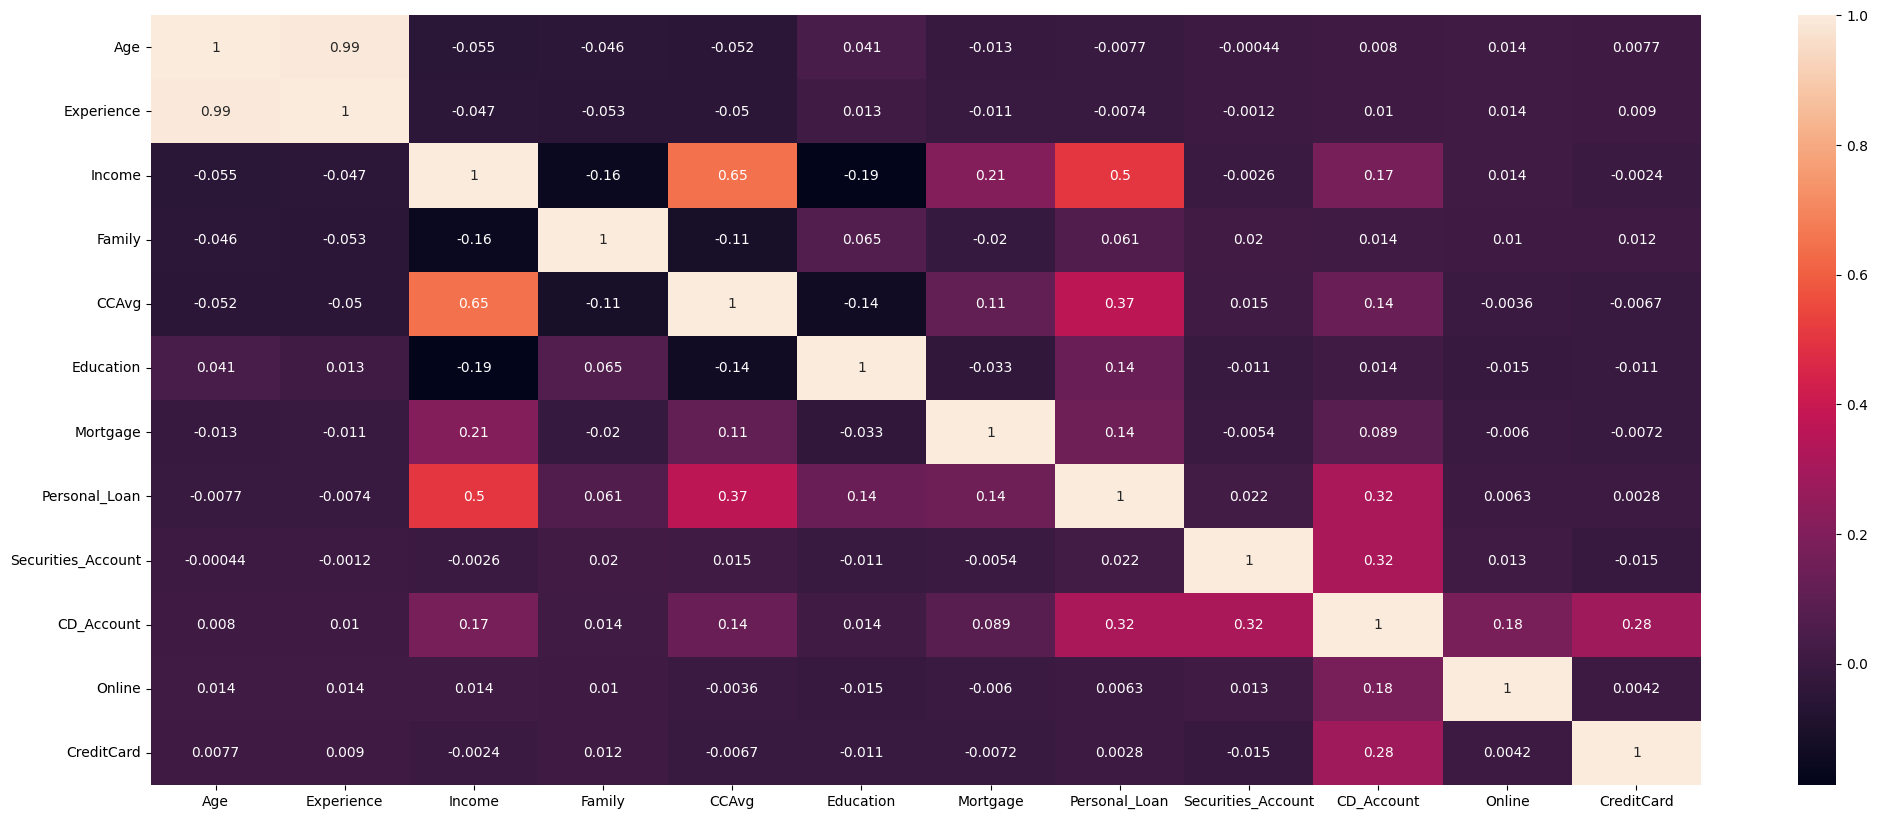

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

* There is a strong correlation between age and experience as expected.
* There is a correlation between number of credit cards and Income.
* There is a correlation between personal loan and income.
* There is a correlation between number of credit cards and personal loan.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

* We won't revmove any outliers as they are valid values
* There are no missing values
* Features are already engineered

### Data preparation for modelling

In [ ]:
#Split data to feature variables and target variable
X=df.drop('Personal_Loan',axis=1)
y=df['Personal_Loan']

#Let us drop ZIP code as it is a categorical variable and there are many unique values. We can map it to a region, but then the number of columns would become very large.

X.drop('ZIPCode',axis=1,inplace=True)

In [ ]:
# Do a 75-25 split of data to train and test with a random state
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3750, 11)
Shape of test set :  (1250, 11)
Percentage of classes in training set:
Personal_Loan
0    0.907733
1    0.092267
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.8928
1    0.1072
Name: proportion, dtype: float64


The distribution of the target variable in train and test looks comparable

In [ ]:
y_test.head()

,Personal_Loan
ID,
1502,0
2587,1
2654,0
1056,0
706,0


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions**
* It can predict that a customer will take a personal loan, but in reality he does not - False positives.
* It can predict that a customer will not take a personal loan, but in reality he does - False negatives.

**Which case is more important**
We have to minimize second case, which is false negative, because we are losing out on potential customers.

In this case we have to maximize recall, which will result in minimizing the False Negatives.

But we will go with the F1_score as it maximizes both recall and precision.

There is no point in getting a high recall score, if the precision value is very low.

F1_Score is calculated as (2 * Precision * Recall)/(Precision + Recall).



In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# Creating a function to display the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree

In [ ]:
# Create a decision tree
model0=DecisionTreeClassifier(random_state=1)
model0.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

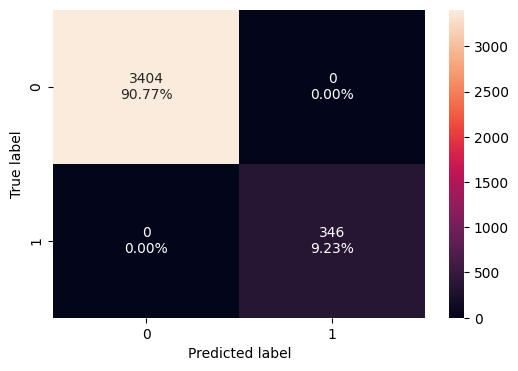

In [ ]:
confusion_matrix_sklearn(model0,X_train,y_train)

In [ ]:
decision_tree_performance=model_performance_classification_sklearn(model0,X_train,y_train)
decision_tree_performance

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


All the values looks good, this could be because of overfitting.The actual test would be on the test data.

Let us check the metrics on the test data

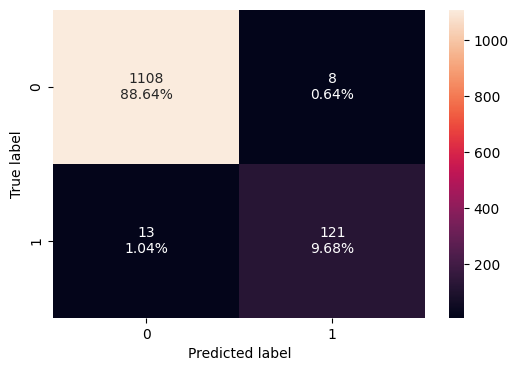

In [ ]:
confusion_matrix_sklearn(model0,X_test,y_test)

In [ ]:
decision_tree_performance=model_performance_classification_sklearn(model0,X_test,y_test)
decision_tree_performance

,Accuracy,Recall,Precision,F1
0,0.9832,0.902985,0.937984,0.920152


We have very good metrics for test data as well.

But the decision tree could be very large and may be we can optimize the tree using pre-pruning or post-pruning techniques.

Since the number of customers who does not have personal loan is approximately 90%, this will be dominant class and the decision tree would be biased towards this class.

So we have to balance the classes, so that weights are inversly proportional to the class frequencies in the input data.

### Decision Tree(With Class Weights)

In [ ]:
model1=DecisionTreeClassifier(class_weight='balanced',random_state=1)
model1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

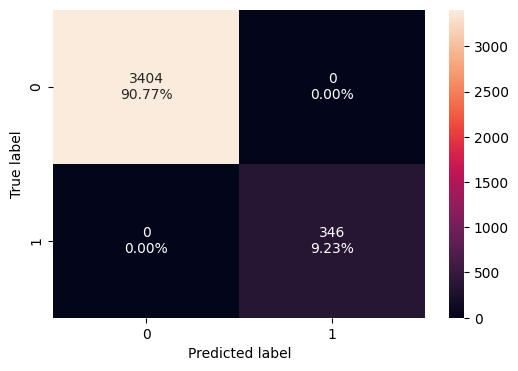

In [ ]:
confusion_matrix_sklearn(model1,X_train,y_train)

In [ ]:
decision_tree_performance=model_performance_classification_sklearn(model1,X_train,y_train)
decision_tree_performance

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


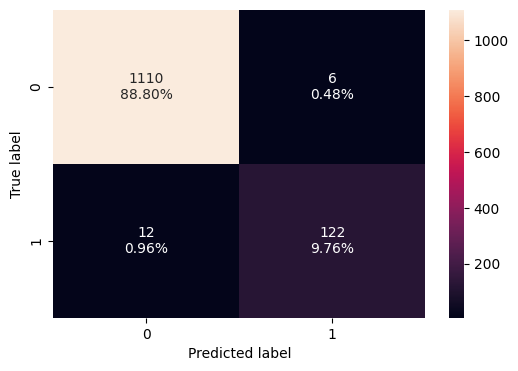

In [ ]:
confusion_matrix_sklearn(model1,X_test,y_test)

In [ ]:
decision_tree_performance=model_performance_classification_sklearn(model1,X_test,y_test)
decision_tree_performance

,Accuracy,Recall,Precision,F1
0,0.9856,0.910448,0.953125,0.931298


As this model has all the metrics above 80% we will use this model for further optimization.

### Let us visualize the decision tree

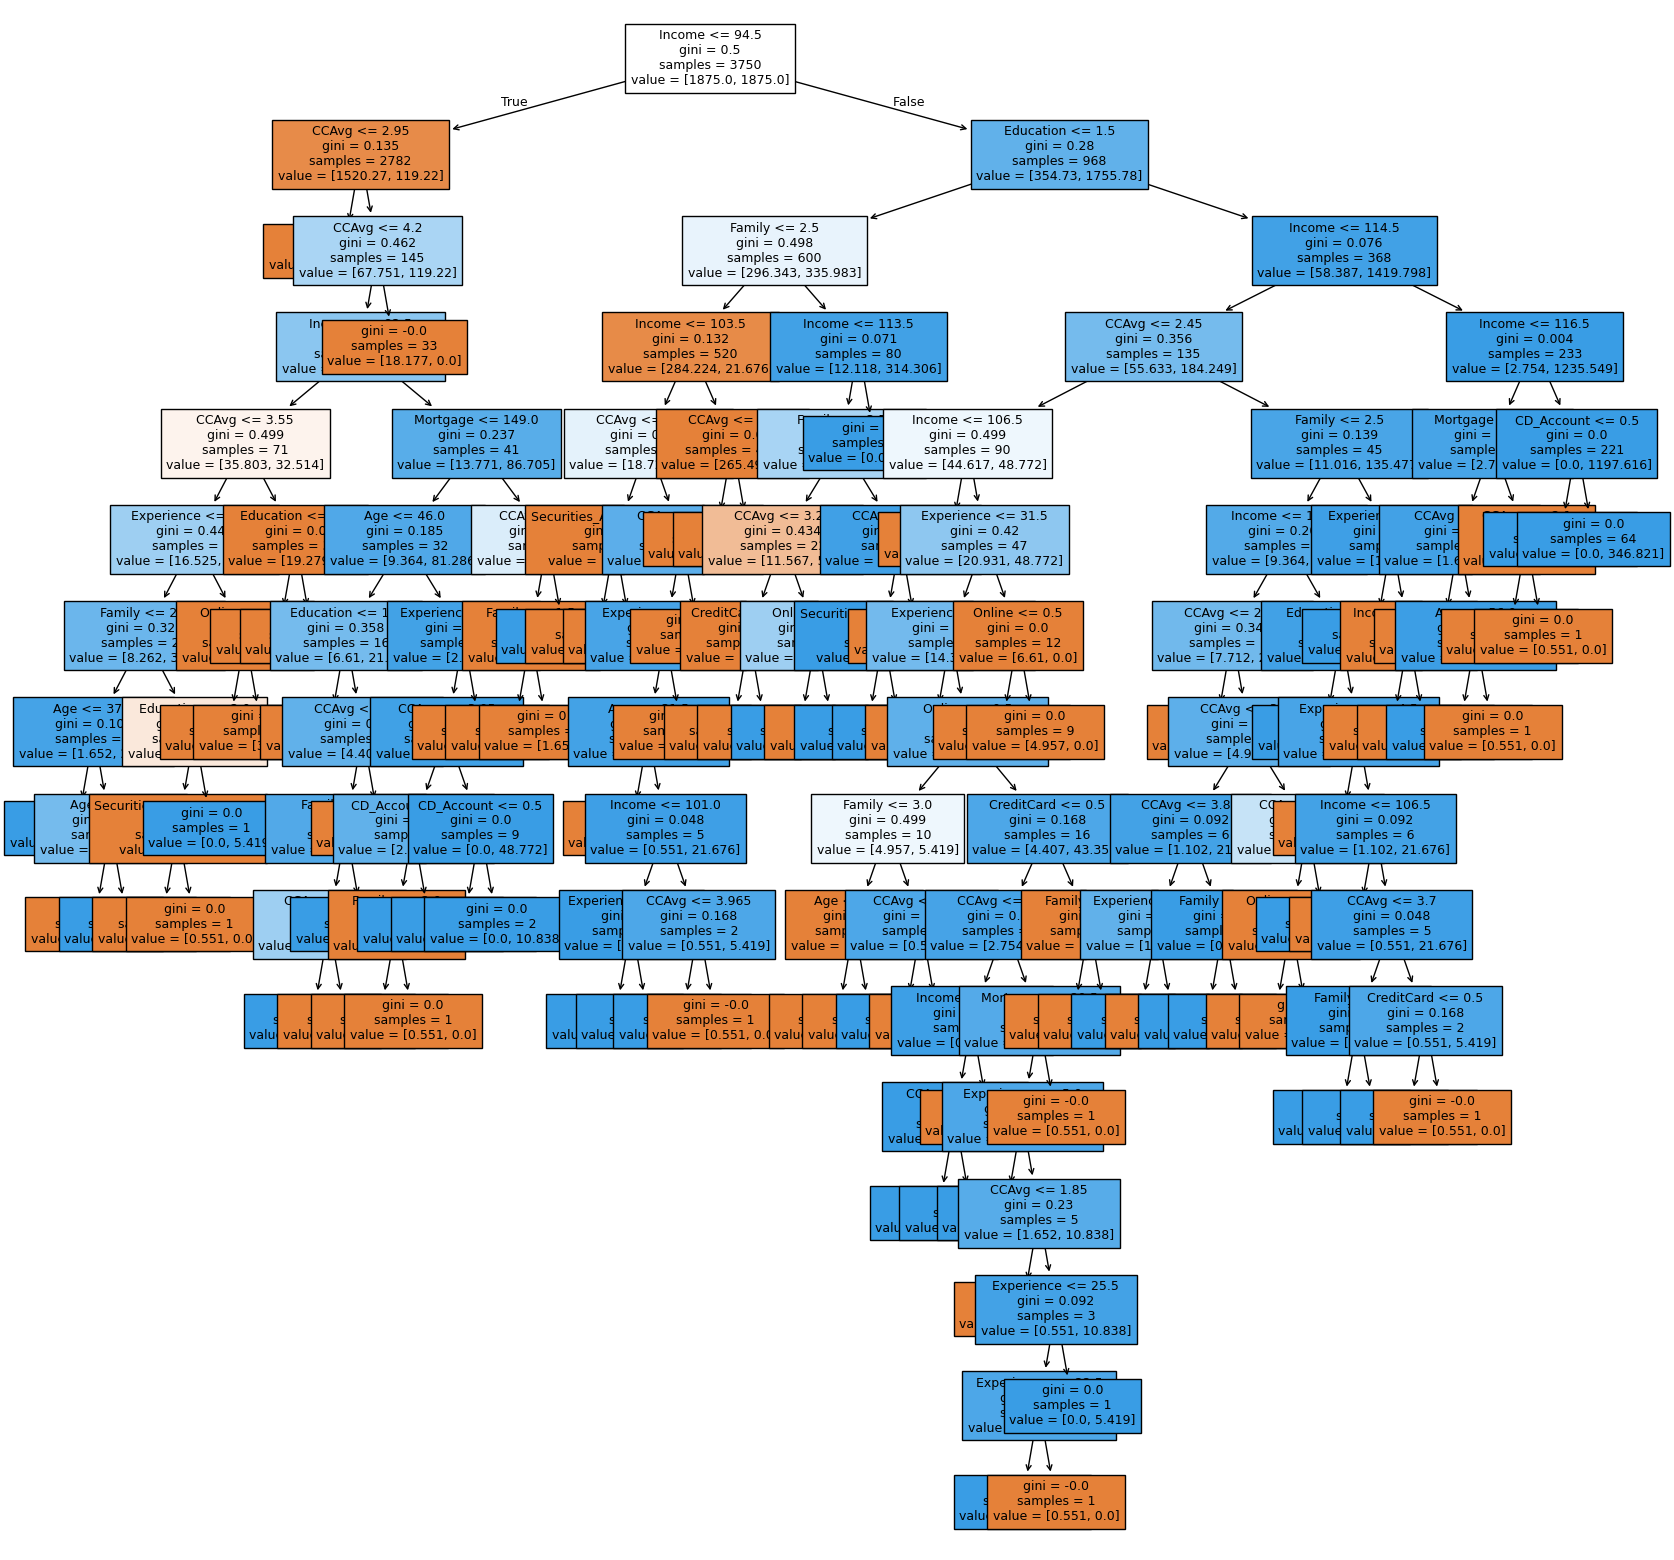

In [ ]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    model1,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

Let us view the important features

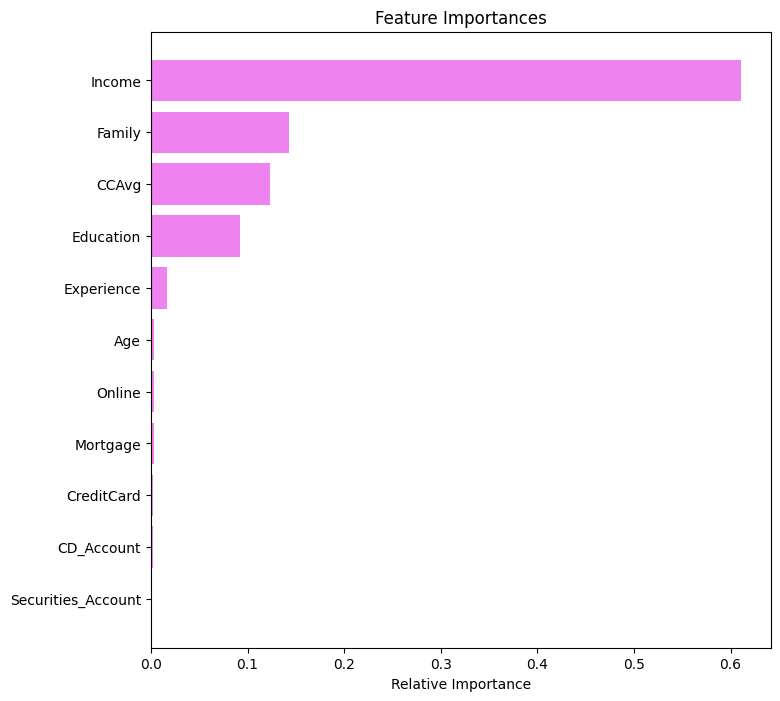

In [ ]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

As seen from the above diagram, Income, Family, Number of credit cards help and education are the important parameters which decide if a person is likely to take a personal loan.

The pre-puned model has a perfect score of 1 for accurancy, recall, precision and F1_score. So the model is overfitting. We will have to pre-pune the decision tree, so that it gives generalized result on unseen data as well.

## Model Performance Improvement

## Let us build a pre-puned decision tree

In [ ]:
#Check the depth of the original decision tree
depth = model1.tree_.max_depth

print("Depth of the tree:", depth)

Depth of the tree: 15


In [ ]:
#Find the number of total nodes
total_nodes = model1.tree_.node_count

print("Total number of nodes in the tree:", total_nodes)

Total number of nodes in the tree: 177


In [ ]:
#Get total number of leaf nodes
from sklearn import tree

# Access the tree structure
tree_ = model1.tree_

# Count the leaf nodes
leaf_nodes = 0
for i in range(tree_.node_count):
    if tree_.children_left[i] == -1 and tree_.children_right[i] == -1:
        leaf_nodes += 1

print("Number of leaf nodes:", leaf_nodes)

Number of leaf nodes: 89


In [ ]:
# Let us find the optimum hyperparameters for the model and pre-prune accorgingly.
# We will use gridsearchCV for the same
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, 12, 14],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model1, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
prepruned_model = grid_search.best_estimator_

In [ ]:
# Let us fit the prepruned model
prepruned_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=14, random_state=1)

In [ ]:
total_nodes = prepruned_model.tree_.node_count

print("Total number of nodes in the tree:", total_nodes)

Total number of nodes in the tree: 175


In [ ]:
print(prepruned_model.max_depth)

14


In [ ]:
#Get total number of leaf nodes
from sklearn import tree

# Access the tree structure
tree_ = prepruned_model.tree_

# Count the leaf nodes
leaf_nodes = 0
for i in range(tree_.node_count):
    if tree_.children_left[i] == -1 and tree_.children_right[i] == -1:
        leaf_nodes += 1

print("Number of leaf nodes:", leaf_nodes)

Number of leaf nodes: 88


In [ ]:
print(prepruned_model.min_samples_split)

2


In [ ]:
print(prepruned_model.min_samples_leaf)

1


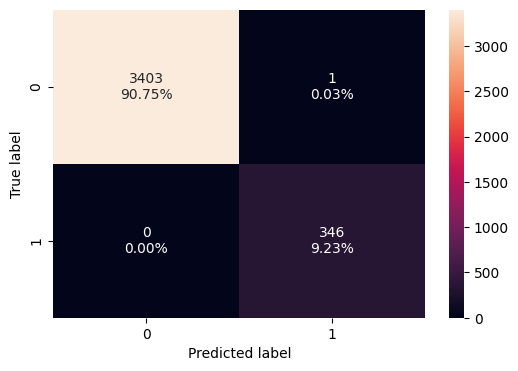

In [ ]:
confusion_matrix_sklearn(prepruned_model,X_train,y_train)

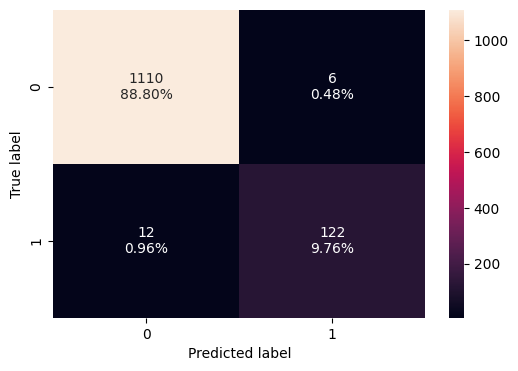

In [ ]:
confusion_matrix_sklearn(prepruned_model,X_test,y_test)

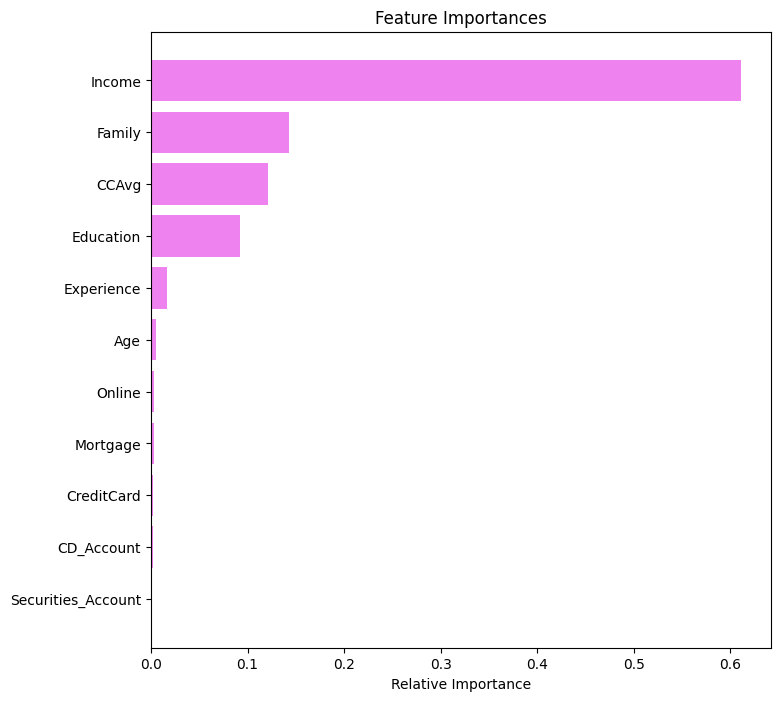

In [ ]:
importances = prepruned_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
prepruned_model_train_performance=model_performance_classification_sklearn(prepruned_model,X_train,y_train)
prepruned_model_train_performance

,Accuracy,Recall,Precision,F1
0,0.999733,1.0,0.997118,0.998557


In [ ]:
prepruned_model_test_performance=model_performance_classification_sklearn(prepruned_model,X_test,y_test)
prepruned_model_test_performance

,Accuracy,Recall,Precision,F1
0,0.9856,0.910448,0.953125,0.931298


In [ ]:
#Let us try to pre-prune the model using for loop instead of gridsearchCV and see if there are any drastic difference
#Since we are trying to predict potential personal loan customer, we have to minimize false negatives, so we will try to maximize recall.

In [ ]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 15, 2)
max_leaf_nodes_values = [10, 20, 30 , 40, 50, 75]
min_samples_split_values = [2, 5, 10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 10
Min samples split: 2
Best test recall score: 1.0


In [ ]:
prepruned_model2=best_estimator

In [ ]:
prepruned_model2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=10,
                       random_state=42)

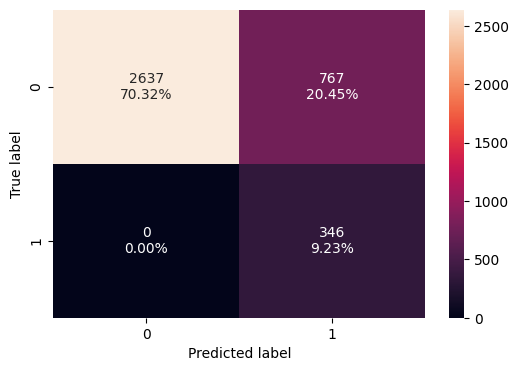

In [ ]:
confusion_matrix_sklearn(prepruned_model2,X_train,y_train)

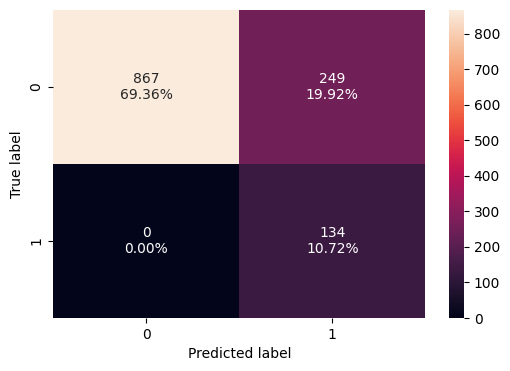

In [ ]:
confusion_matrix_sklearn(prepruned_model2,X_test,y_test)

In [ ]:
decision_tree_performance=model_performance_classification_sklearn(prepruned_model2,X_train,y_train)
decision_tree_performance

,Accuracy,Recall,Precision,F1
0,0.795467,1.0,0.310872,0.474297


In [ ]:
decision_tree_performance=model_performance_classification_sklearn(prepruned_model2,X_test,y_test)
decision_tree_performance

,Accuracy,Recall,Precision,F1
0,0.8008,1.0,0.349869,0.518375


As we can see the precision and the F1 score of the model is very less, so we will discard this model. We will try to maximize the F1 score.

In [ ]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 15, 2)
max_leaf_nodes_values = [10, 20, 30 , 40, 50, 75]
min_samples_split_values = [2, 5, 10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_f1_score - test_f1_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_f1_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_f1_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test f1 score: {best_test_score}")

Best parameters found:
Max depth: 8
Max leaf nodes: 30
Min samples split: 10
Best test f1 score: 0.9136690647482014


In [ ]:
prepruned_model3=best_estimator

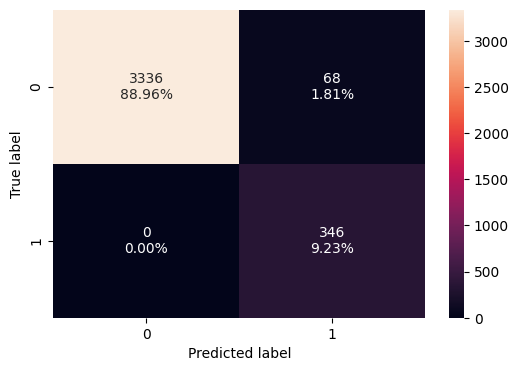

In [ ]:
confusion_matrix_sklearn(prepruned_model3,X_train,y_train)

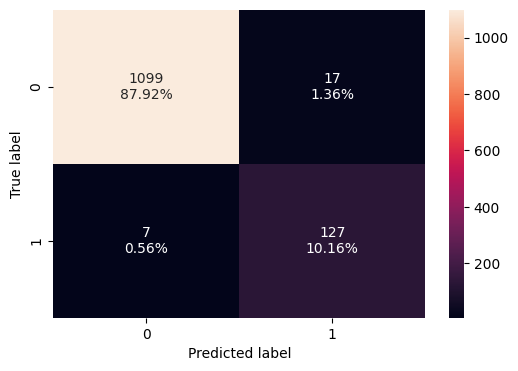

In [ ]:
confusion_matrix_sklearn(prepruned_model3,X_test,y_test)

In [ ]:
prepruned_model3_train_performance=model_performance_classification_sklearn(prepruned_model3,X_train,y_train)
prepruned_model3_train_performance

,Accuracy,Recall,Precision,F1
0,0.981867,1.0,0.835749,0.910526


In [ ]:
prepruned_model3_test_performance=model_performance_classification_sklearn(prepruned_model3,X_test,y_test)
prepruned_model3_test_performance

,Accuracy,Recall,Precision,F1
0,0.9808,0.947761,0.881944,0.913669


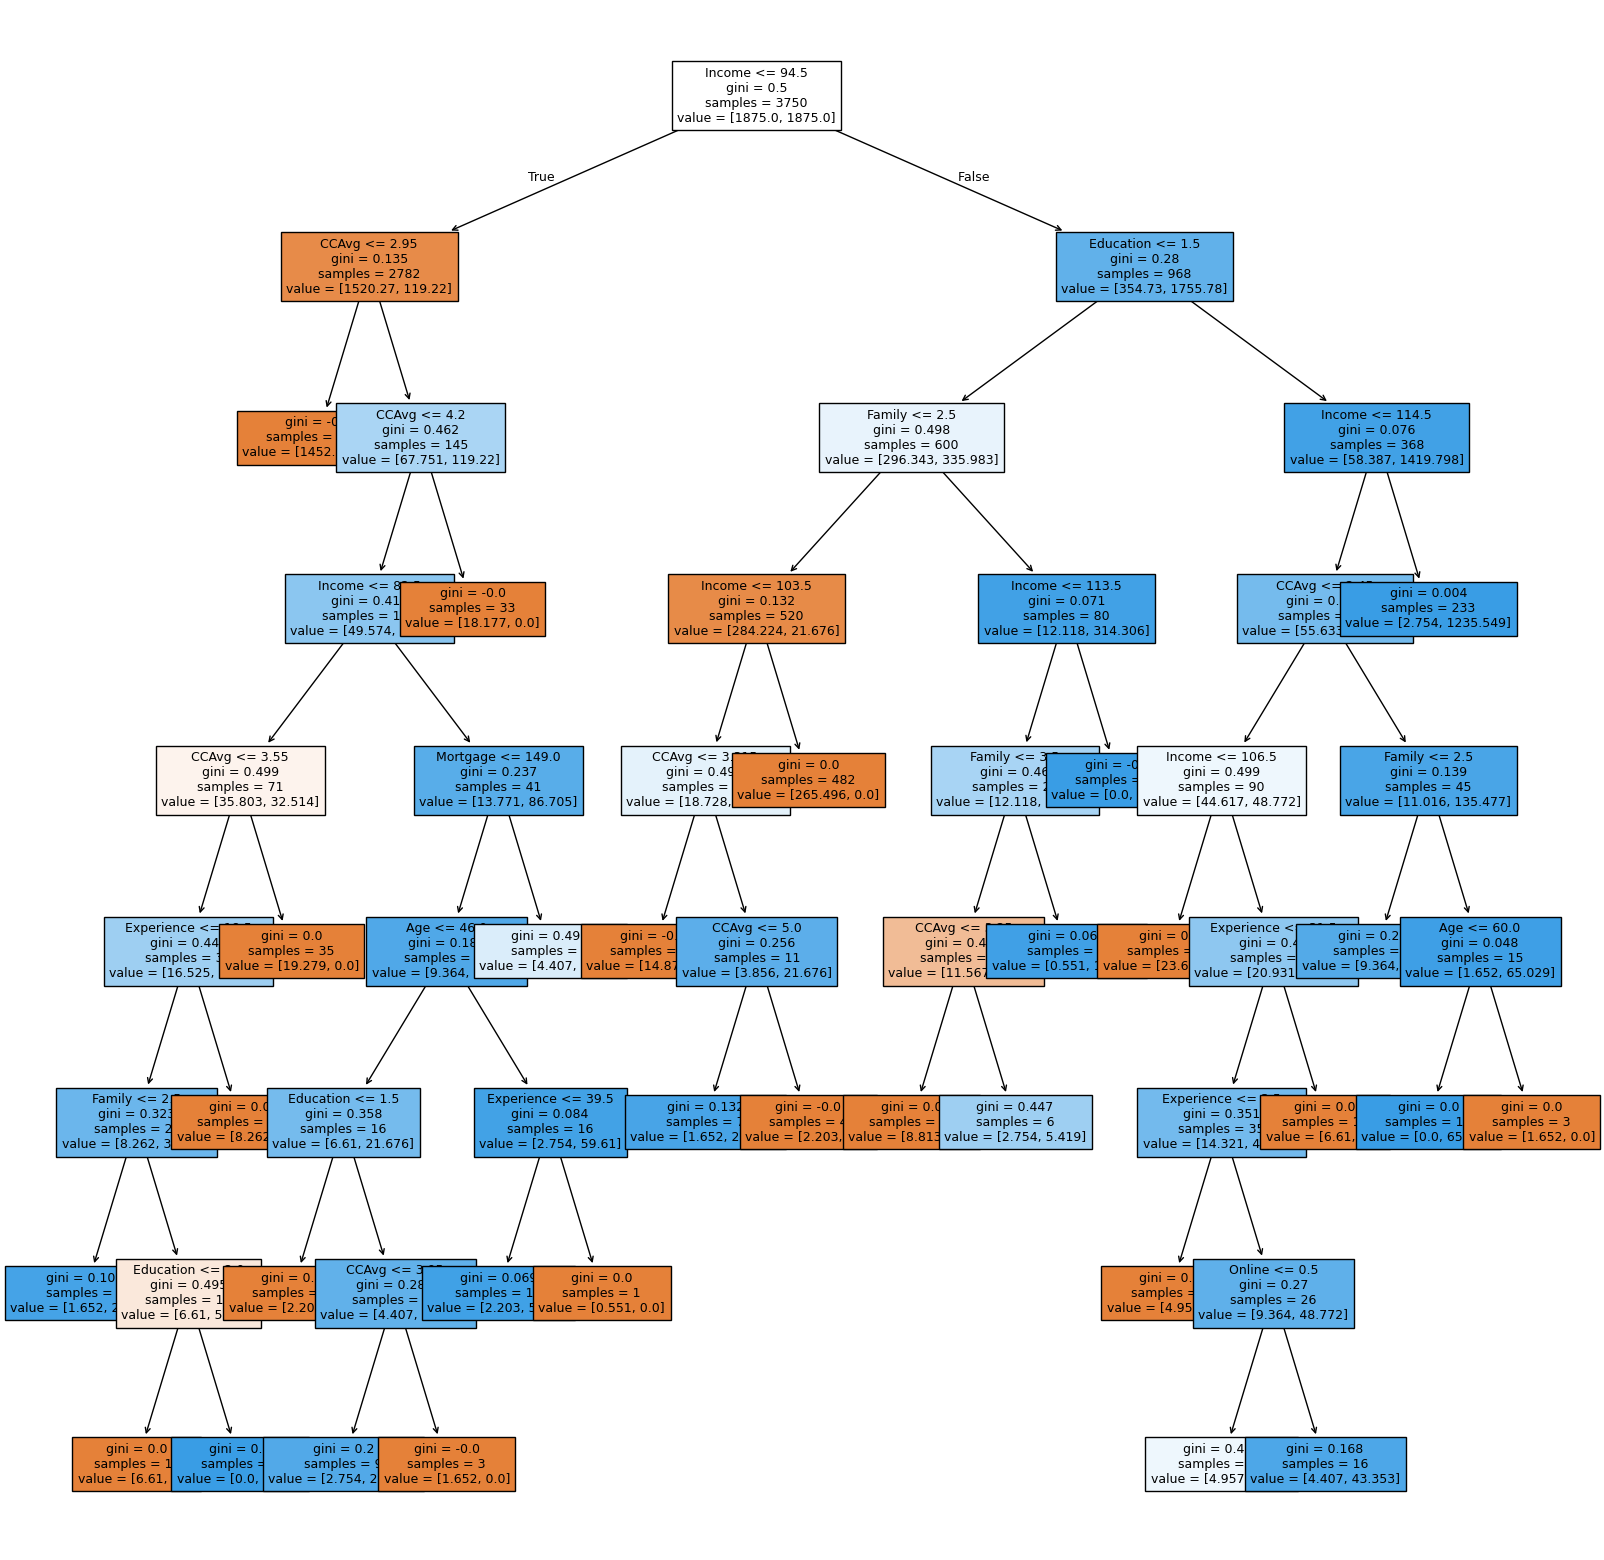

In [ ]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    prepruned_model3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

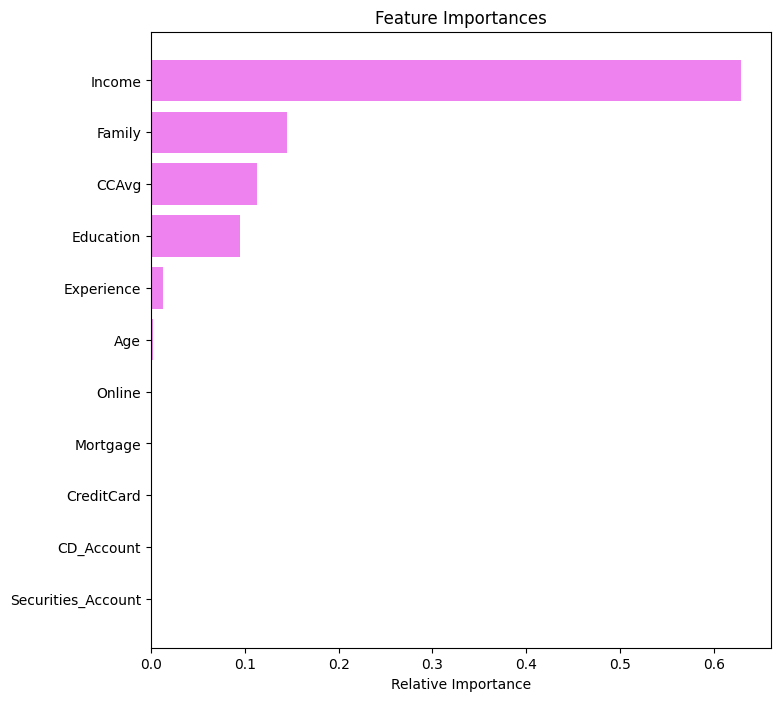

In [ ]:
#Let us see the important features
importances = prepruned_model3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Now let us try to post-prune the decision tree

In [ ]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000244,0.000489
2,0.000245,0.001470
3,0.000260,0.002508
4,0.000356,0.002864
5,0.000356,0.003220
6,0.000356,0.004286
7,0.000381,0.005048
8,0.000390,0.006218
9,0.000400,0.006618


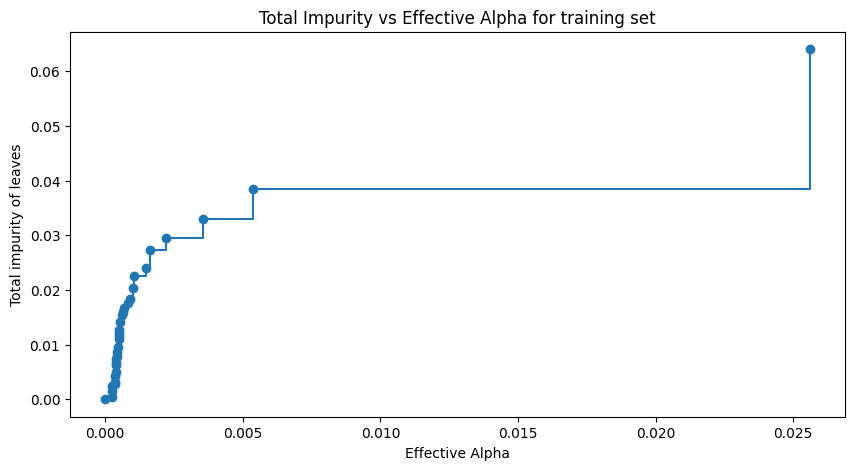

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value(full tree),
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=42, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)



Number of nodes in the last tree is: 7 with ccp_alpha: 0.051730283542010765


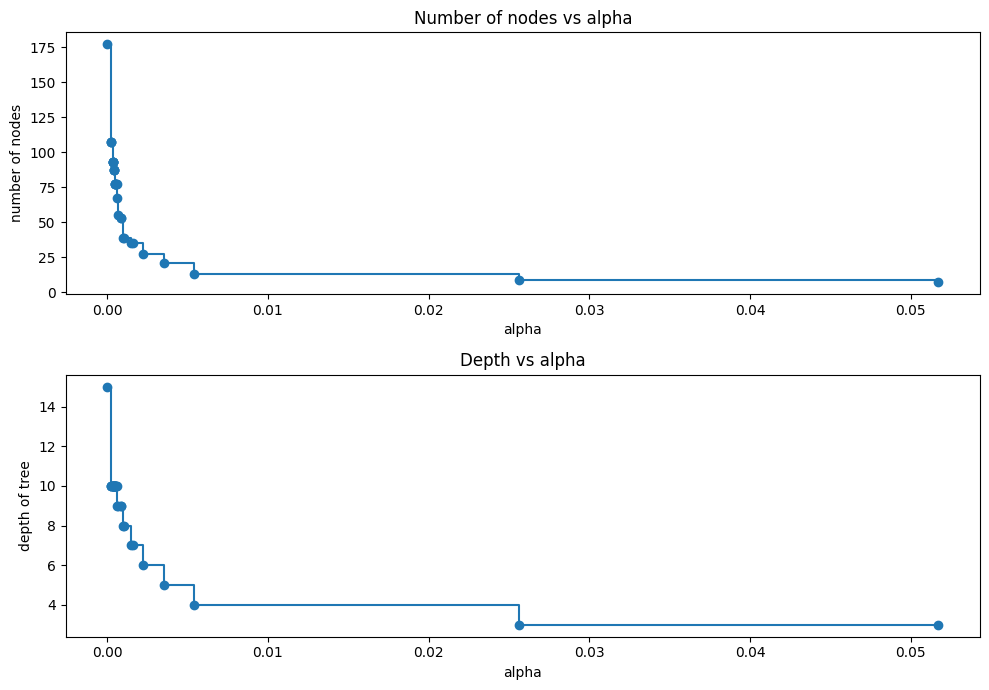

In [ ]:


node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [ ]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)

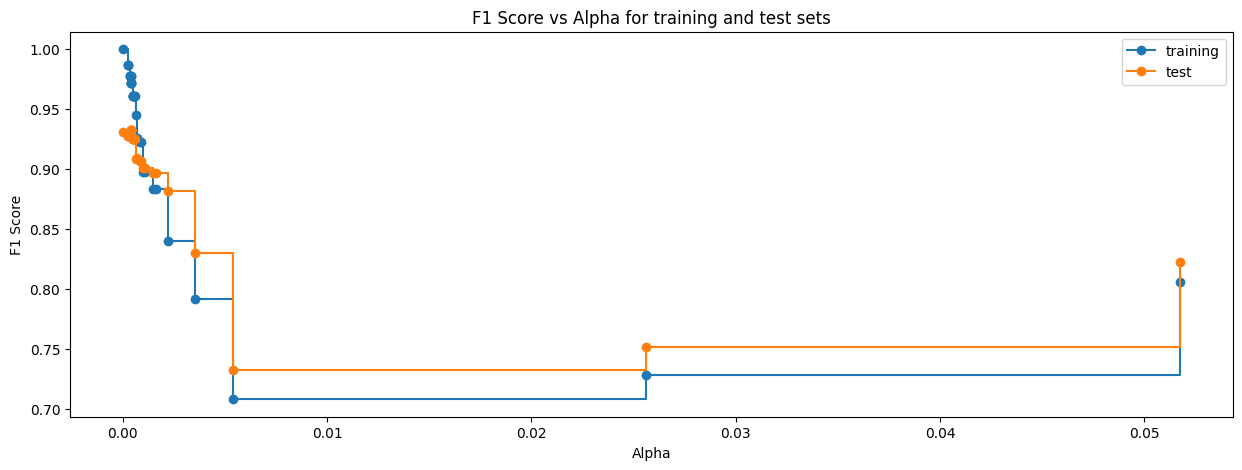

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [ ]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=0.0004, class_weight='balanced',
                       random_state=42)


In [ ]:
postpruned_model=dtree3

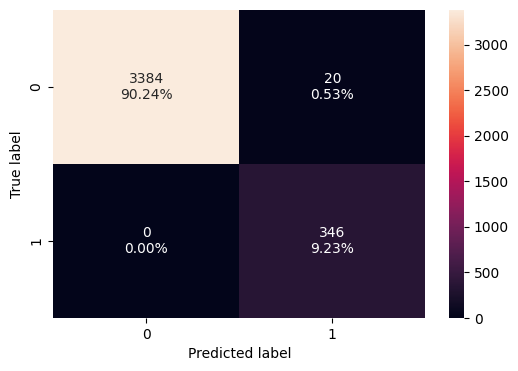

In [ ]:
confusion_matrix_sklearn(postpruned_model,X_train,y_train)

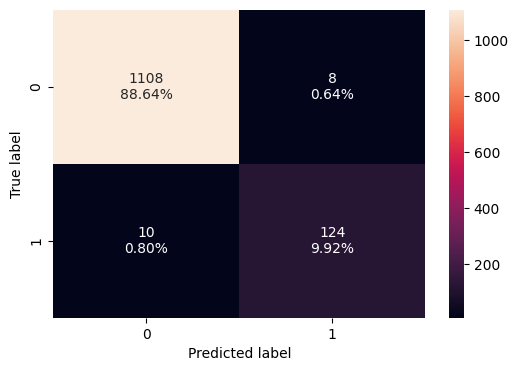

In [ ]:
confusion_matrix_sklearn(postpruned_model,X_test,y_test)

In [ ]:
postpruned_model_train_performance=model_performance_classification_sklearn(postpruned_model,X_train,y_train)
postpruned_model_train_performance

,Accuracy,Recall,Precision,F1
0,0.994667,1.0,0.945355,0.97191


In [ ]:
postpruned_model_test_performance=model_performance_classification_sklearn(postpruned_model,X_test,y_test)
postpruned_model_test_performance

,Accuracy,Recall,Precision,F1
0,0.9856,0.925373,0.939394,0.932331


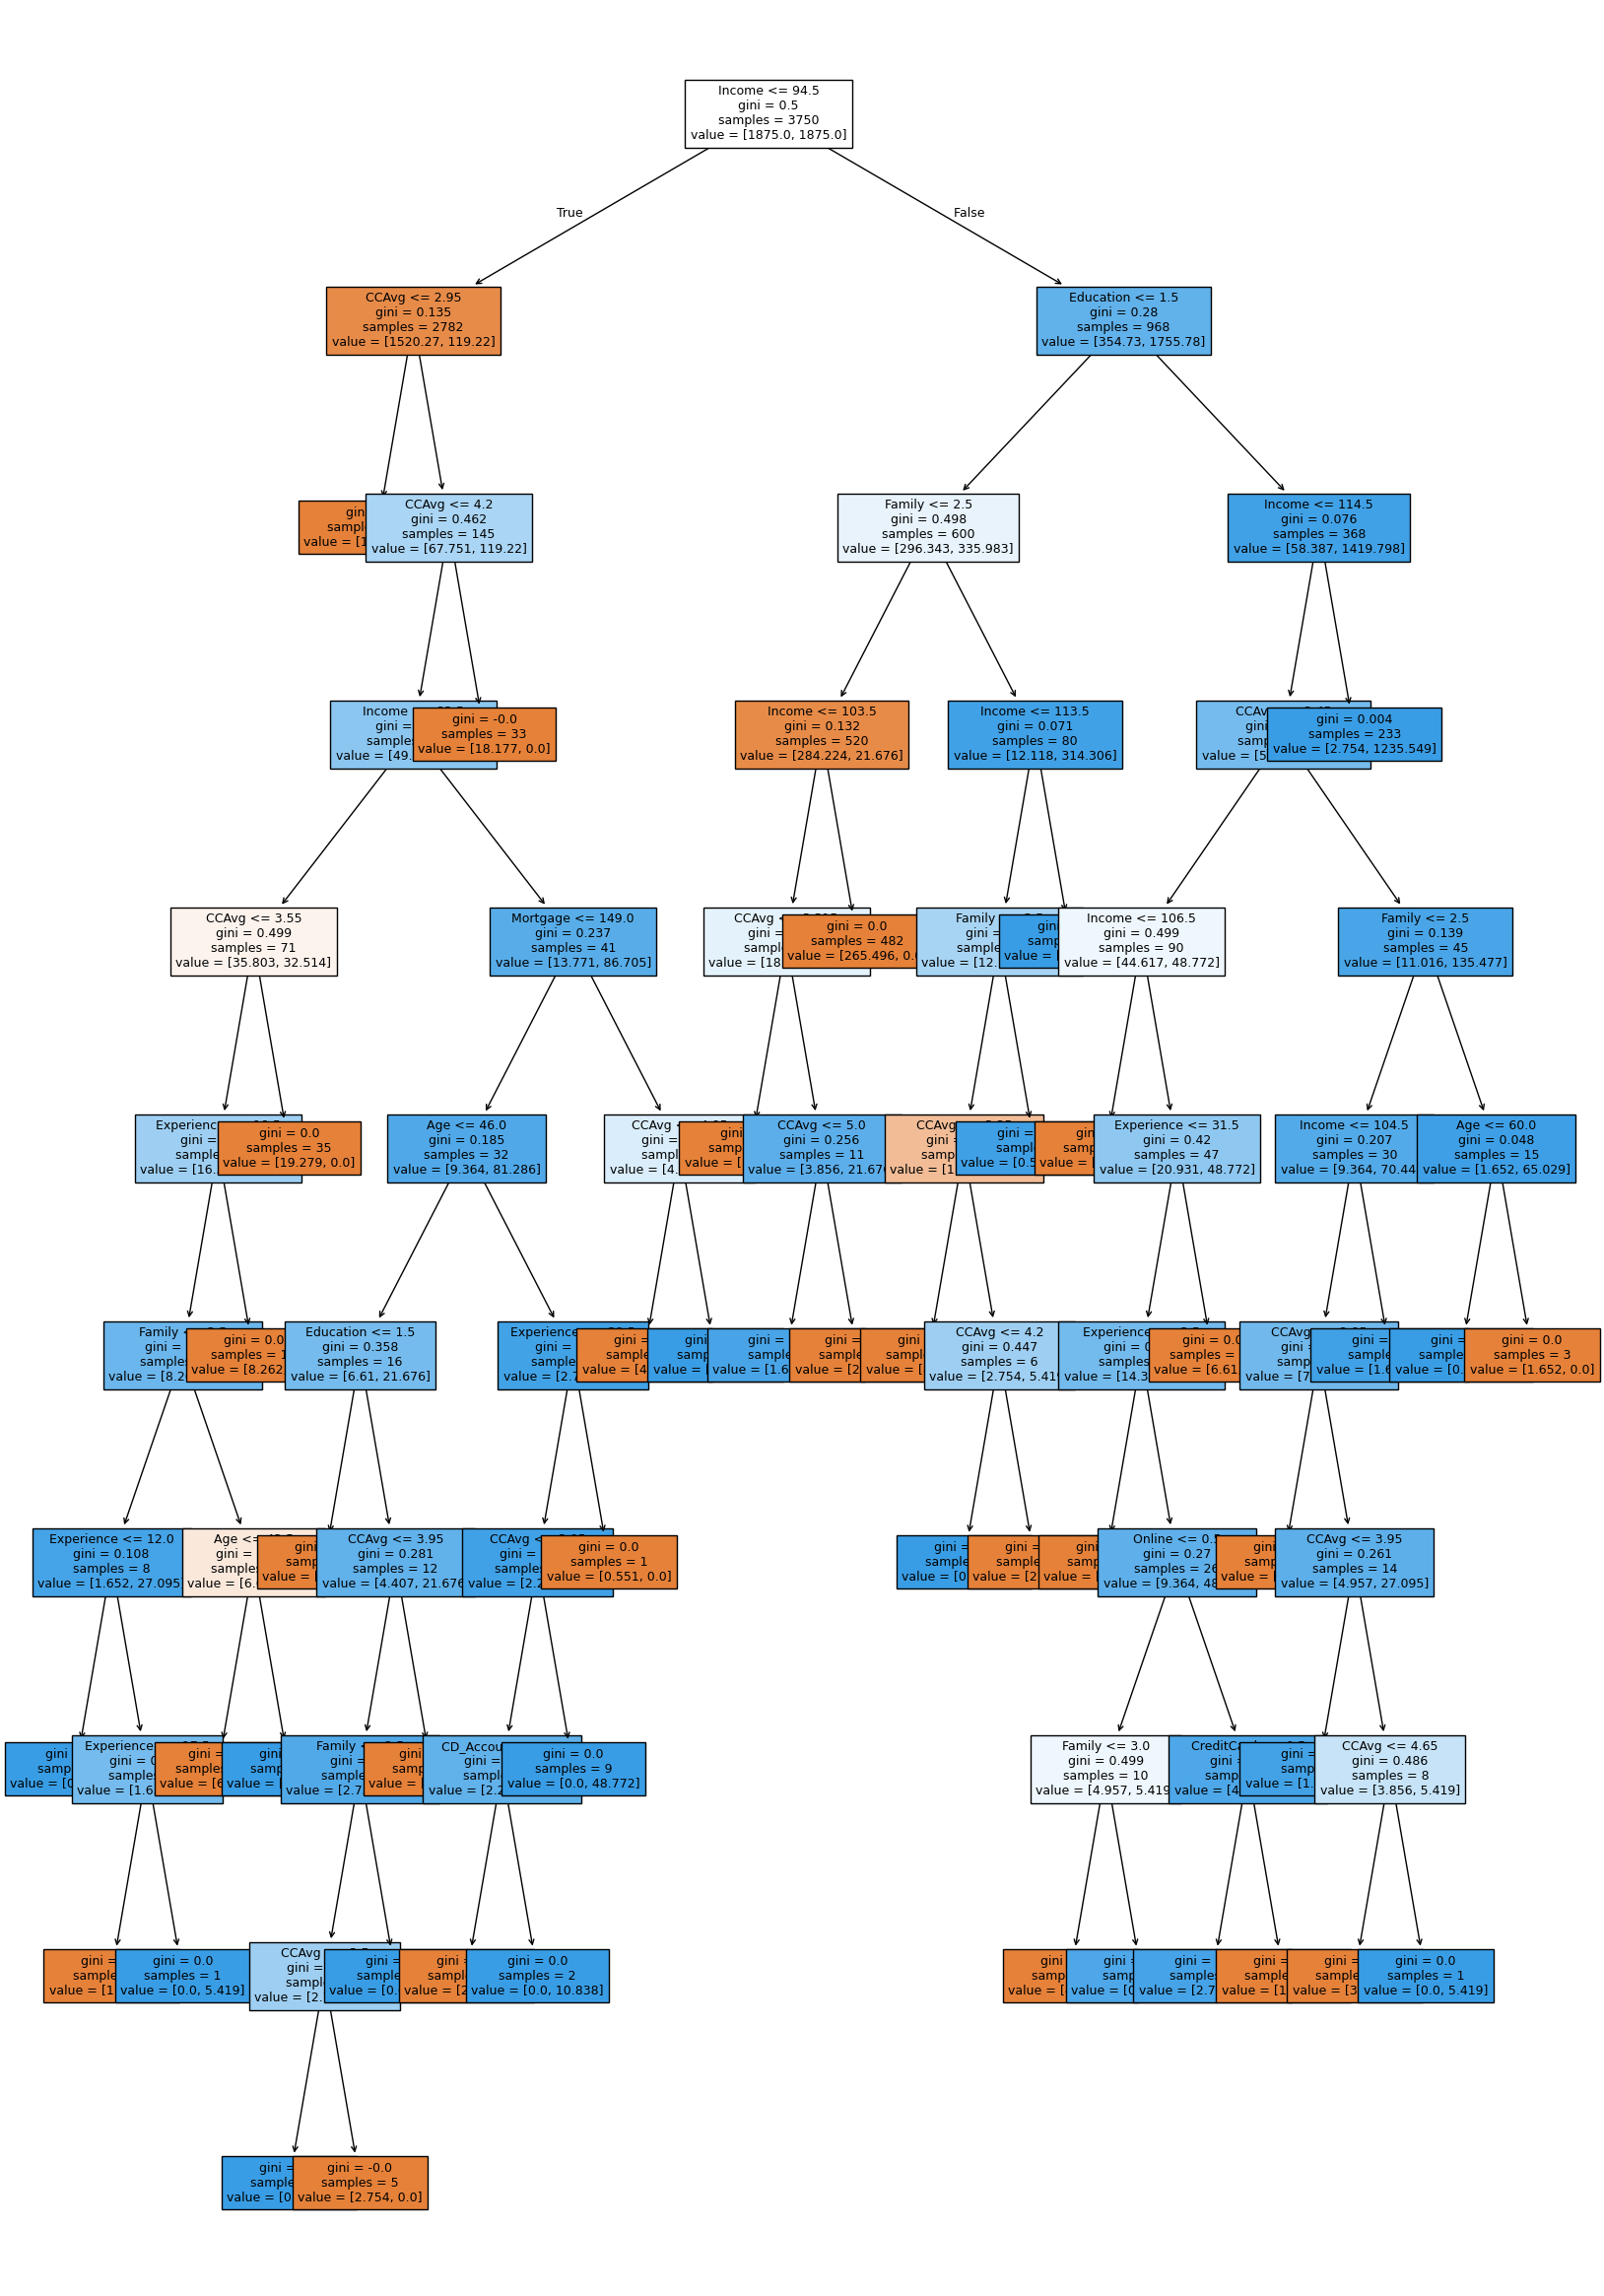

In [ ]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 30))

# plotting the decision tree
out = tree.plot_tree(
    dtree3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        postpruned_model,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 94.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1452.52, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 4.20
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |--- Experience <= 18.50
|   |   |   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |   |   |--- Experience <= 12.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 21.68] class: 1
|   |   |   |   |   |   |   |--- Experience >  12.00
|   |   |   |   |   |   |   |   |--- Experience <= 17.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Experience >  17.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 5.42] class: 1
|   |   |   |   |   |   |--- Family >  2.50
|   |   |   |   |   |   |   |--- Age <= 42.50
|   |   |   |   |   |   |   |   |--- weights: [6.61, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  42.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 5.42] class:

In [ ]:
print(f"Max depth: {postpruned_model.tree_.max_depth}")

Max depth: 10


## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        prepruned_model_train_performance.T,
        prepruned_model3_train_performance.T,
        postpruned_model_train_performance.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (Pre-Pruning-Gridsearch)",
    "Decision Tree (Pre-Pruning-maxF1)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (Pre-Pruning-Gridsearch),Decision Tree (Pre-Pruning-maxF1),Decision Tree (Post-Pruning)
Accuracy,0.999733,0.981867,0.994667
Recall,1.000000,1.000000,1.000000
Precision,0.997118,0.835749,0.945355
F1,0.998557,0.910526,0.971910


In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        prepruned_model_test_performance.T,
        prepruned_model3_test_performance.T,
        postpruned_model_test_performance.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (Pre-Pruning-Gridsearch)",
    "Decision Tree (Pre-Pruning-maxF1)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree (Pre-Pruning-Gridsearch),Decision Tree (Pre-Pruning-maxF1),Decision Tree (Post-Pruning)
Accuracy,0.985600,0.980800,0.985600
Recall,0.910448,0.947761,0.925373
Precision,0.953125,0.881944,0.939394
F1,0.931298,0.913669,0.932331


Out of this post-pruning and Pre-pruning-maxF1 has the best performance. Out of these 2 - post pruning displays consistent performance across test and train. So we will select the post pruning model as our final model.

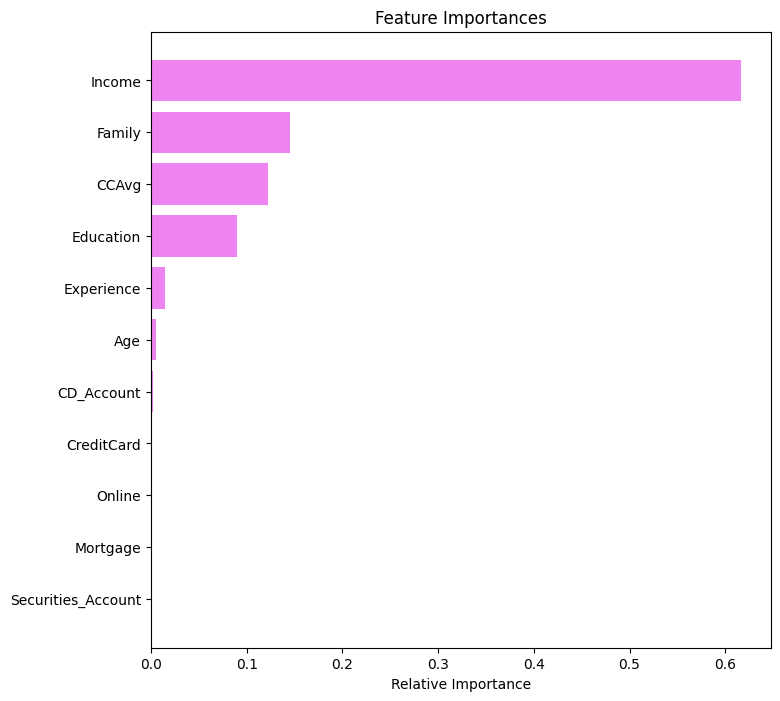

In [ ]:
# importance of features in the tree building
importances = postpruned_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
%%time
# choosing a data point
applicant_details = X_test.iloc[:1, :]

# making a prediction
approval_prediction = postpruned_model.predict(applicant_details)

print(approval_prediction)

[0]
CPU times: user 4.78 ms, sys: 0 ns, total: 4.78 ms
Wall time: 6.65 ms


In [ ]:
%%time
# choosing a data point
applicant_details = X_test.iloc[:1, :]

# making a prediction
approval_prediction = prepruned_model3.predict(applicant_details)

print(approval_prediction)

[0]
CPU times: user 3.99 ms, sys: 0 ns, total: 3.99 ms
Wall time: 4.37 ms


There is no much difference in the performance between the prepruned model and the post pruned model.

In [ ]:
# making a prediction
approval_likelihood = postpruned_model.predict_proba(applicant_details)

print(approval_likelihood[0, 1])

0.0


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

The most important features which decide if a customer will take a personal loan are the following:
* Income
* Number of family members
* Number of Credit card held
* Education

Customers with income more than 94.5K are more likely to take personal loan

So the promotion should be targetted at higher income, bigger families, holding more number of credit cards and higher educated customers.

We can also show probability of taking a personal loan by a customer, customers with higher probability can be targetted for promotion.

___